Problem definition

We have the following informations from rossmann in two different tables:

* Id: An Id that represents a (Store, Date) duple within the test set
* Store: A unique Id for each store
* Sales: The turnover on a given day (our target variable)
* Customers: The number of customers on a given day
* Open: open: 0 = the store is closed , 1 = the store is open
* StateHoliday: Indicates a state holiday. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday: Store on this Date was affected or not by the closure of public schools
* StoreType: 4 different stores:a,b,c,d
* Assortment: a = basic, b = extra, c = extended
* CompetitionDistance: Distance in meters to the nearest competitor store
* CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
* Promo: Promo or not on that day
* Promo2: Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is   participating
* Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
* PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:

# Importing libraries needed for EDA:

import numpy as np # Used for linear algebra
import pandas as pd # Used for data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Used for visualization 
import seaborn as sns
from datetime import datetime
plt.style.use("ggplot") # to make the plots to look nicer

In [2]:
#Importing the train and test files:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
store_df = pd.read_csv("store.csv")

C:\Users\Poshali\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Checking the number of data in the files:
print("in the training set we have", train_df.shape[0], "observations and", train_df.shape[1], "columns/variables.")
print("in the testing set we have", test_df.shape[0], "observations and", test_df.shape[1], "columns/variables.")
print("in the store set we have", store_df.shape[0], "observations and", store_df.shape[1], "columns/variables.")

in the training set we have 1017209 observations and 9 columns/variables.
in the testing set we have 41088 observations and 8 columns/variables.
in the store set we have 1115 observations and 10 columns/variables.


Starting first with understanding and cleaning the training dataset.

In [4]:
#Checking how does the data looks like:
train_df.head().append(train_df.tail()) #show the first and last 5 rows.

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [5]:
#no missing values.
train_df.isnull().all()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [6]:
#Understanding sales data in the train file
opened_sales = (train_df[(train_df.Open == 1) & (train_df.Sales)]) #if the stores are opened and had sales
opened_sales.Sales.describe()

count    422307.000000
mean       6951.782199
std        3101.768685
min         133.000000
25%        4853.000000
50%        6367.000000
75%        8355.000000
max       41551.000000
Name: Sales, dtype: float64

<AxesSubplot:title={'center':'Sales Boxplot'}>

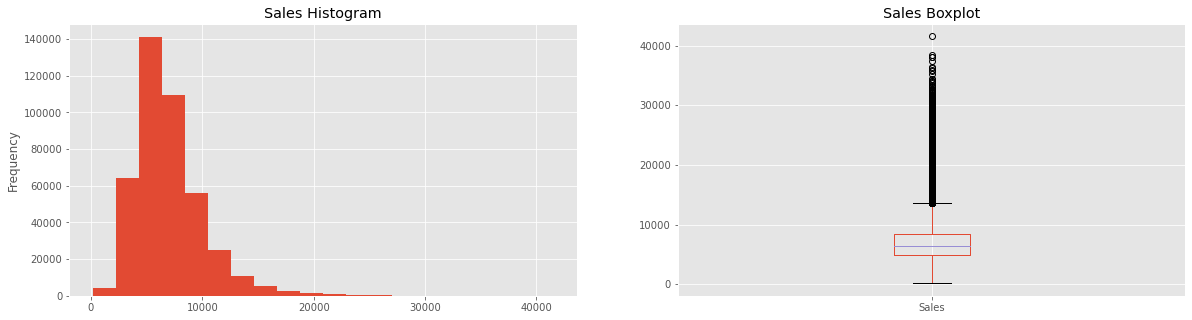

In [7]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

opened_sales.Sales.plot(kind = "hist", title = "Sales Histogram", bins = 20, ax = ax[0])
opened_sales.Sales.plot.box(title = "Sales Boxplot", ax = ax[1])

In [8]:
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales > 10000)].count() / opened_sales.shape[0] * 100, 2), 
      "% of the time big sales, over 10000 Euros")
print("Rossmann has", round(opened_sales.Sales[(opened_sales.Sales < 1000)].count() / opened_sales.shape[0] * 100, 4), 
      "% of the time low sales, under 1000 Euros")

Rossmann has 13.45 % of the time big sales, over 10000 Euros
Rossmann has 0.0277 % of the time low sales, under 1000 Euros


In [9]:
#Understanding customer data in the train file
train_df.Customers.describe()

count    1.017209e+06
mean     6.331459e+02
std      4.644117e+02
min      0.000000e+00
25%      4.050000e+02
50%      6.090000e+02
75%      8.370000e+02
max      7.388000e+03
Name: Customers, dtype: float64

<AxesSubplot:title={'center':'Sales Boxplot'}>

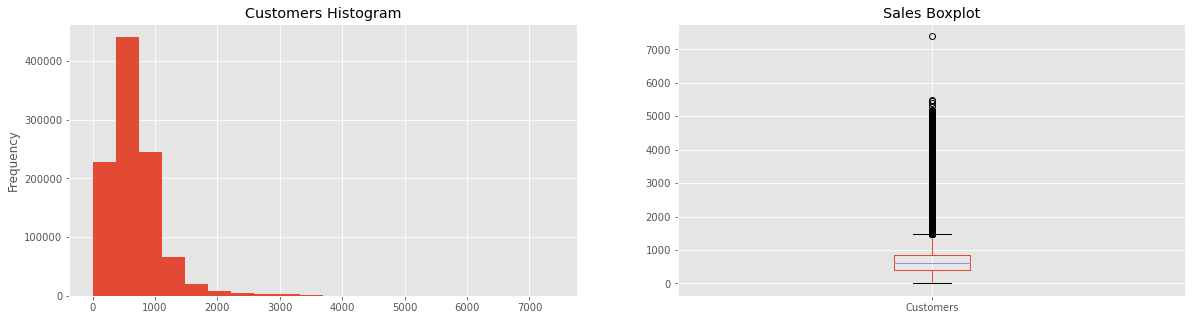

In [10]:
f, ax = plt.subplots(1,2, figsize = (20, 5))

train_df.Customers.plot(kind = "hist", title = "Customers Histogram", bins = 20, ax = ax[0])
train_df.Customers.plot.box(title = "Sales Boxplot", ax = ax[1])

In [11]:
#On checking for outliers it can be seen that on 22th of January 2013, they hit the highest record of customers
train_df[(train_df.Customers > 6000)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
993496,817,2,2013-01-22,27190,7388,1,1,0,0


In [12]:
print("In 3 years, different stores where", train_df[(train_df.Open == 0)].count()[0], "times closed")
print("From this days,", train_df[(train_df.Open == 0) & 
         ((train_df.StateHoliday == "a") | 
         (train_df.StateHoliday == "b") | 
         (train_df.StateHoliday == "c"))].count()[0], "times the stores were closed because of holidays")
print(train_df[(train_df.Open == 0) & (train_df.SchoolHoliday == 1)].count()[0], "times, some stores were closed because of school holiday")
print("The stores were opened on some sundays ->", train_df[(train_df.Open == 1) & (train_df.DayOfWeek == 7)].count()[0], "times")
print("However,", train_df[(train_df.Open == 0) & ((train_df.StateHoliday == "0") | (train_df.StateHoliday == 0)) & (train_df.SchoolHoliday == 0)].count()[0], 
      "times, the stores were closed for no reason (No Holidays)")

In 3 years, different stores where 172817 times closed
From this days, 30140 times the stores were closed because of holidays
18264 times, some stores were closed because of school holiday
The stores were opened on some sundays -> 3593 times
However, 139610 times, the stores were closed for no reason (No Holidays)


Analysing Promotion

In [13]:
print(round((train_df.Promo[train_df.Promo == 1].count() / train_df.shape[0] * 100), 2), "% of the time, promotions have been made")

38.15 % of the time, promotions have been made


Now looking at StateHoliday Variable.

In [14]:
# StateHoliday is not a continous number. 
train_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [15]:
# StateHoliday is a string and it is not so important to know what kind of holiday (a, b or c). 
#So it is converted into 0 and 1, by creating a new variable
train_df["StateHoliday_cat"] = train_df["StateHoliday"].map({0:0, "0": 0, "a": 1, "b": 1, "c": 1})
train_df.StateHoliday_cat.count()

1017209

In [16]:
# Getting rid of the StateHoliday column and using only the new one StateHoliday_cat
train_df = train_df.drop("StateHoliday", axis = 1)
train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat
1017204,1111,2,2013-01-01,0,0,0,0,1,1
1017205,1112,2,2013-01-01,0,0,0,0,1,1
1017206,1113,2,2013-01-01,0,0,0,0,1,1
1017207,1114,2,2013-01-01,0,0,0,0,1,1
1017208,1115,2,2013-01-01,0,0,0,0,1,1


In [17]:
#Deleting the times, where the stores were closed and hence had no sales, as we don't want this while predicting
train_df = train_df.drop(train_df[(train_df.Open == 0) & (train_df.Sales == 0)].index)
train_df = train_df.reset_index(drop = True) # to ge the indexes back to 0, 1, 2,etc.


In [18]:
train_df.isnull().all() #to check for NaNs

Store               False
DayOfWeek           False
Date                False
Sales               False
Customers           False
Open                False
Promo               False
SchoolHoliday       False
StateHoliday_cat    False
dtype: bool

# Store Analysis

In [19]:
store_df.head().append(store_df.tail())  #show the first and last 5 rows.

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [20]:
#how many missing data do we have in %:
100- (store_df.count() / store_df.shape[0] * 100)

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

In [21]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Lets start with the missing data. The first one is CompetitionDistance

the median is 2325.0 and mean is 5404.901079136691


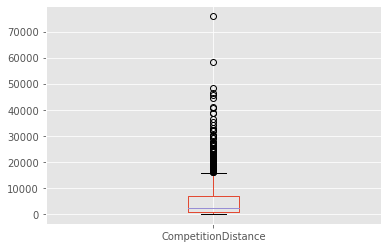

In [22]:
store_df.CompetitionDistance.plot.box() #checking for outliers, so we can choose between mean and median to fill the NaNs
print("the median is", store_df.CompetitionDistance.median(), "and mean is", store_df.CompetitionDistance.mean())

In [23]:
#Since we have here some outlier, it is better to input the median value to those few missing values.
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace = True)

CompetitionOpenSinceMonth and CompetitionOpenSinceYear.

In [24]:
#The missing values, are not there, because the stores had no competition. So the missing values are filled with zeros.
store_df["CompetitionOpenSinceMonth"].fillna(0, inplace = True)
store_df["CompetitionOpenSinceYear"].fillna(0, inplace = True)

Looking at the promotions since Week and year and interval.

In [25]:
store_df.groupby(by = "Promo2", axis = 0).count()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Promo2,,,,,,,,,
0,544,544,544,544,544,544,0,0,0
1,571,571,571,571,571,571,571,571,571


In [26]:
# If no promo has been made, then the NaN values from Promo since Week and Year are replaced with zero
store_df["Promo2SinceWeek"].fillna(0, inplace = True)
store_df["Promo2SinceYear"].fillna(0, inplace = True)
store_df["PromoInterval"].fillna(0, inplace = True)

store_df.info()

#There are no more null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# Merging of the files: store and train

In [27]:
train_store_df = pd.merge(train_df, store_df, how = "left", on = "Store")
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844392 non-null  int64  
 1   DayOfWeek                  844392 non-null  int64  
 2   Date                       844392 non-null  object 
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Open                       844392 non-null  int64  
 6   Promo                      844392 non-null  int64  
 7   SchoolHoliday              844392 non-null  int64  
 8   StateHoliday_cat           844392 non-null  int64  
 9   StoreType                  844392 non-null  object 
 10  Assortment                 844392 non-null  object 
 11  CompetitionDistance        844392 non-null  float64
 12  CompetitionOpenSinceMonth  844392 non-null  float64
 13  CompetitionOpenSinceYear   84

Analysing Store types.
Comparing the stores by Sales, Customers, etc.

In [28]:
train_store_df["Avg_Customer_Sales"] = train_store_df.Sales / train_store_df.Customers

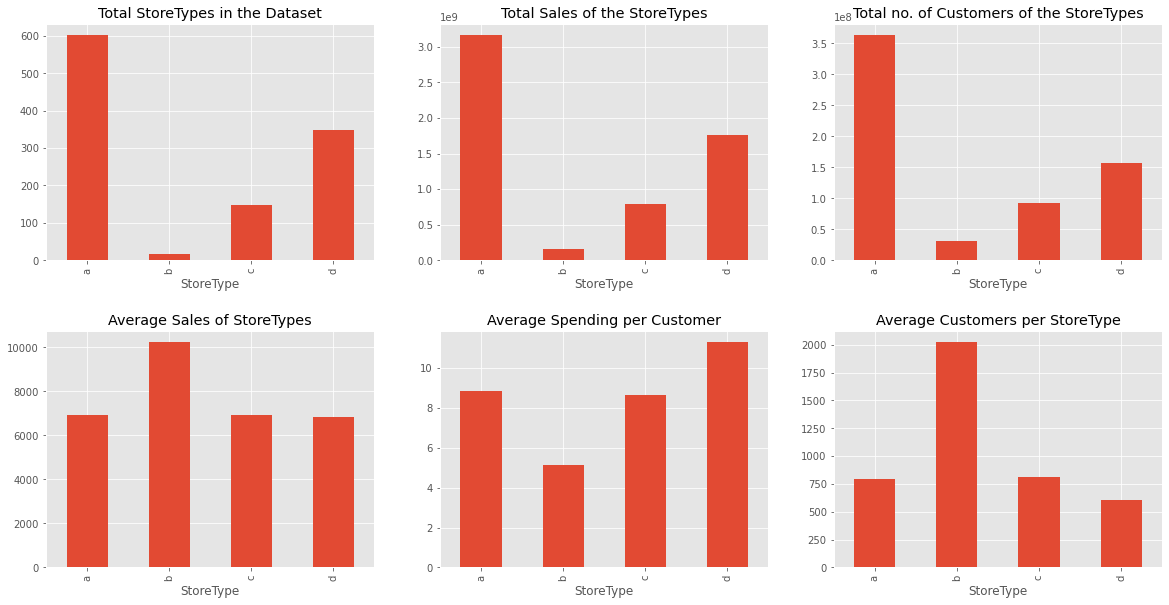

In [29]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
train_store_df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
train_store_df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total no. of Customers of the StoreTypes")
train_store_df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
train_store_df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
train_store_df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3) 
#The subplots_adjust() function in pyplot module of matplotlib library is used to tune the subplot layout.
#hspace : This parameter is the amount of height reserved for space between subplots expressed as a fraction 
#of the average axis height.
plt.show()

Checking the Assortments

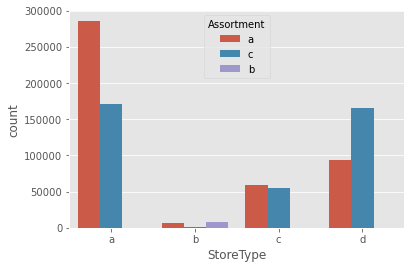

In [30]:
sns.countplot(data = train_store_df, x = "StoreType", hue = "Assortment", order=["a","b","c","d"]) 

plt.show()

#Only the StoreType B has all assortments. This could be the reason of their good performance

Analysing the promotions

In [31]:
train_store_df.Date = train_store_df.Date.astype("datetime64[ns]")

train_store_df["Month"] = train_store_df.Date.dt.month
train_store_df["Year"] = train_store_df.Date.dt.year
train_store_df["Day"] = train_store_df.Date.dt.day

C:\Users\Poshali\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


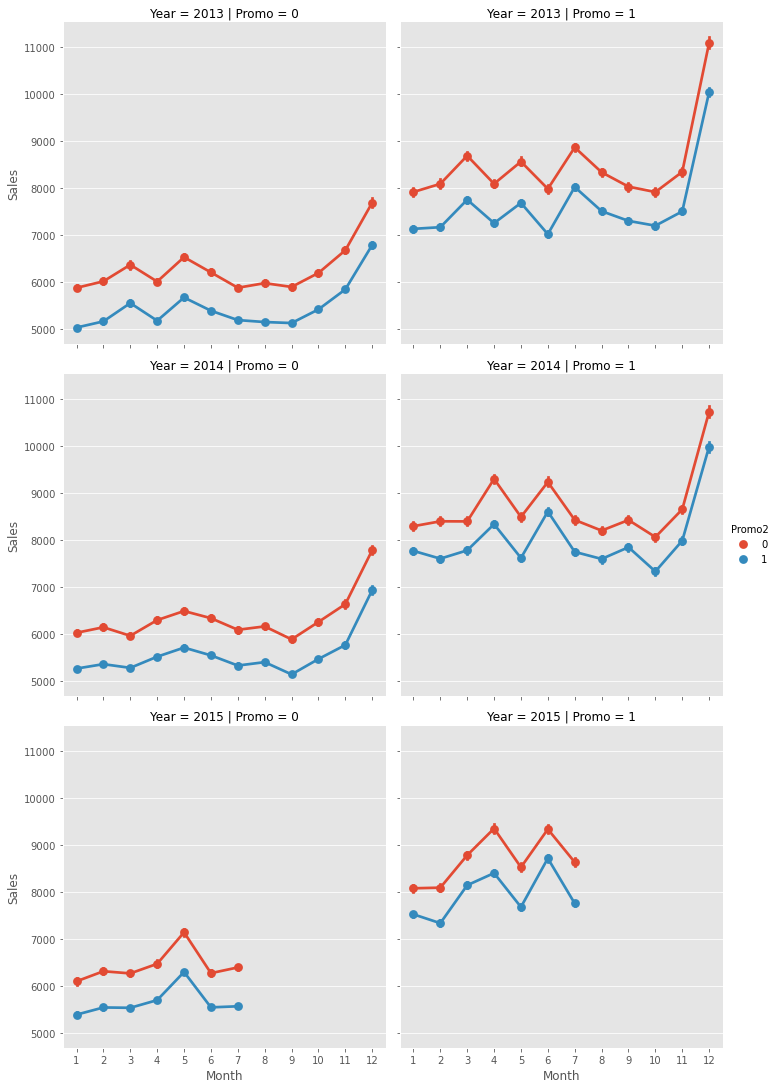

In [32]:
sns.factorplot(data = train_store_df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             )
# It can be seen that if the stores are having promotion the sales are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2).


C:\Users\Poshali\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


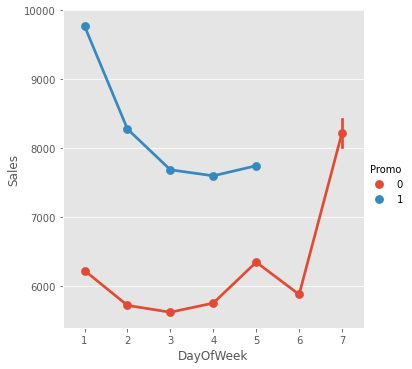

In [33]:
sns.factorplot(data = train_store_df, x = "DayOfWeek", y = "Sales", hue = "Promo")

Trends on a yearly basis

In [34]:
#There is no promotion on the weekend. However, the sales are very high, if the stores have promotion. 
#The Sales are very high on Sunday.
print("There are", train_store_df[(train_store_df.Open == 1) & (train_store_df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")

There are 33 stores opend on sundays


C:\Users\Poshali\anaconda\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


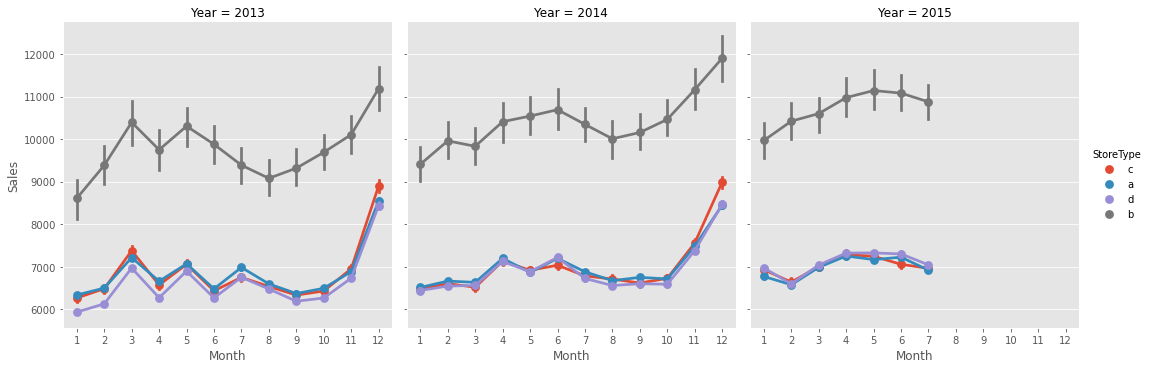

In [35]:
sns.factorplot(data = train_store_df, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# We can see a seasonality. The sales stays constant yearly.

 Checking the impact of Competition Distance on the sales.

In [36]:
train_store_df.CompetitionDistance.describe()

count    844392.000000
mean       5449.868829
std        7800.946702
min          20.000000
25%         710.000000
50%        2325.000000
75%        6880.000000
max       75860.000000
Name: CompetitionDistance, dtype: float64

In [37]:
# The obsverations are continous numbers, so we need to convert them into a categories. A new variable for the categories is created.
train_store_df["CompetitionDistance_Cat"] = pd.cut(train_store_df["CompetitionDistance"], 5)

<AxesSubplot:title={'center':'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

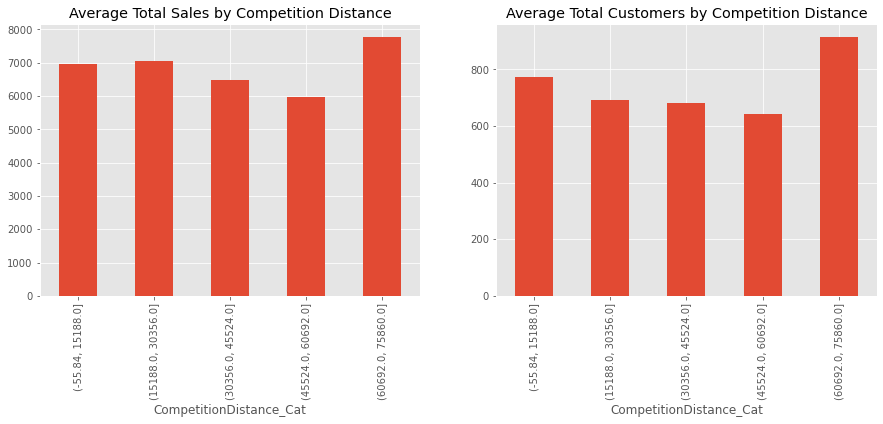

In [38]:
f, ax = plt.subplots(1,2, figsize = (15,5))

train_store_df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
train_store_df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

Correlation graph.

In [39]:
# first we have to convert the variables to categories, before we convert them to codes.

train_store_df["StoreType"] = train_store_df["StoreType"].astype("category")
train_store_df["Assortment"] = train_store_df["Assortment"].astype("category")
train_store_df["PromoInterval"] = train_store_df["PromoInterval"].astype("category")

train_store_df["StoreType_cat"] = train_store_df["StoreType"].cat.codes
train_store_df["Assortment_cat"] = train_store_df["Assortment"].cat.codes
train_store_df["PromoInterval_cat"] = train_store_df["Assortment"].cat.codes

train_store_df["StateHoliday_cat"] = train_store_df["StateHoliday_cat"].astype("float")
train_store_df["StoreType_cat"] = train_store_df["StoreType_cat"].astype("float")
train_store_df["Assortment_cat"] = train_store_df["Assortment_cat"].astype("float")
train_store_df["PromoInterval_cat"] = train_store_df["PromoInterval_cat"].astype("float")

In [40]:
train_store_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844392 non-null  int64         
 1   DayOfWeek                  844392 non-null  int64         
 2   Date                       844392 non-null  datetime64[ns]
 3   Sales                      844392 non-null  int64         
 4   Customers                  844392 non-null  int64         
 5   Open                       844392 non-null  int64         
 6   Promo                      844392 non-null  int64         
 7   SchoolHoliday              844392 non-null  int64         
 8   StateHoliday_cat           844392 non-null  float64       
 9   StoreType                  844392 non-null  category      
 10  Assortment                 844392 non-null  category      
 11  CompetitionDistance        844392 non-null  float64 

In [41]:
train_store_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat,StoreType,...,Promo2SinceYear,PromoInterval,Avg_Customer_Sales,Month,Year,Day,CompetitionDistance_Cat,StoreType_cat,Assortment_cat,PromoInterval_cat
0,1,5,2015-07-31,5263,555,1,1,1,0.0,c,...,0.0,0,9.482883,7,2015,31,"(-55.84, 15188.0]",2.0,0.0,0.0
1,2,5,2015-07-31,6064,625,1,1,1,0.0,a,...,2010.0,"Jan,Apr,Jul,Oct",9.702400,7,2015,31,"(-55.84, 15188.0]",0.0,0.0,0.0
2,3,5,2015-07-31,8314,821,1,1,1,0.0,a,...,2011.0,"Jan,Apr,Jul,Oct",10.126675,7,2015,31,"(-55.84, 15188.0]",0.0,0.0,0.0
3,4,5,2015-07-31,13995,1498,1,1,1,0.0,c,...,0.0,0,9.342457,7,2015,31,"(-55.84, 15188.0]",2.0,2.0,2.0
4,5,5,2015-07-31,4822,559,1,1,1,0.0,a,...,0.0,0,8.626118,7,2015,31,"(15188.0, 30356.0]",0.0,0.0,0.0


<AxesSubplot:>

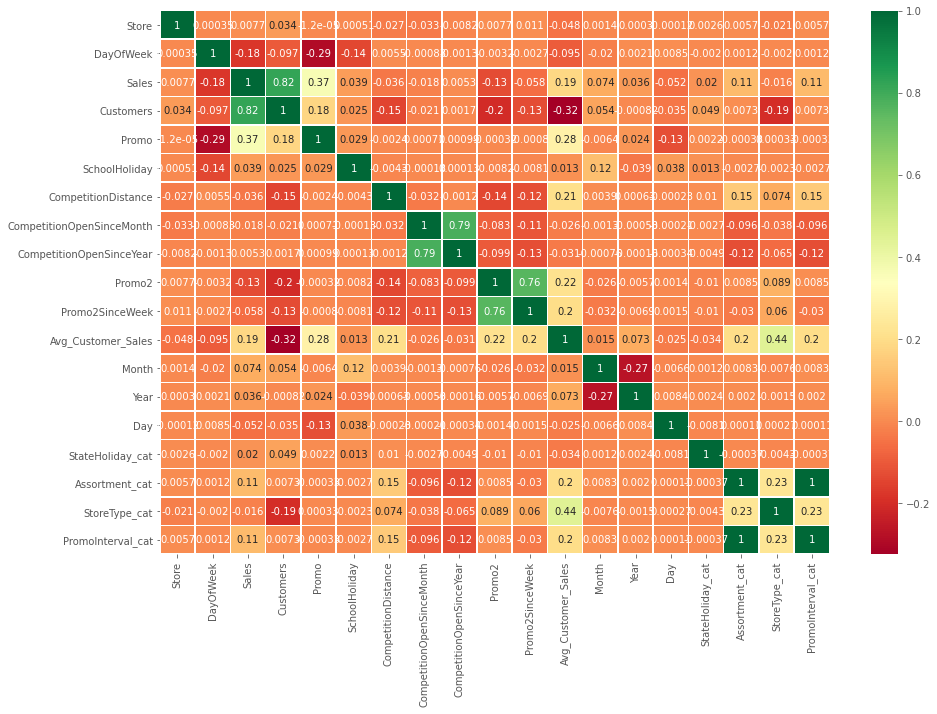

In [42]:
df_correlation = train_store_df[["Store", "DayOfWeek", "Sales", "Customers", "Promo", "SchoolHoliday", "CompetitionDistance", 
                                 "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2", "Promo2SinceWeek", "Avg_Customer_Sales", 
                                 "Month", "Year", "Day", "StateHoliday_cat", "Assortment_cat", "StoreType_cat", "PromoInterval_cat"]]


f, ax = plt.subplots(figsize = (15, 10))
sns.heatmap(df_correlation.corr(),ax = ax, annot=True,cmap='RdYlGn' ,  linewidths=0.5) 

Following correlations can be confirmed from the graph above:

* Customer vs Sales (0.82)
* Promo vs Sales (0.37)
* Avg_Customer_Sales vs Promo (0.28)
* Avg_Customer_Sales vs Promo2 (0.22)
* StoreType vs Avg_Customer_Sales (0.44)

Conclusion of the analysis:
* StoreType A has the most sales and customers.
* StoreType B has the lowest Average Sales per Customer. So probably customers visit this type only for small things.
* StoreType D had the highest average spending by customer.
* Promo runs only in weekdays.
* Customers tends to buy more on Monday, when there's promotion running (Promo) and on Sundays, when there is no promotion at all.
* Seasonal patterns could be observed.

# Random Forest Regression

Feature Engineering.

The CompetitionOpen since... variables have the same meaning. So converting them into one variable that we call CompetitionOpenSince. 
This can help to make it easier for the algorithm to understand the pattern and creates less branches.

In [43]:
train_store_df["CompetitionOpenSince"] = np.where((train_store_df["CompetitionOpenSinceMonth"] == 0) & (train_store_df["CompetitionOpenSinceYear"] == 0), 
                                                0,(train_store_df.Month - train_store_df.CompetitionOpenSinceMonth) + (12 *(train_store_df.Year - train_store_df.CompetitionOpenSinceYear)))

# Dropping the variables
train_store_df = train_store_df.drop(["CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"], axis = 1)

In [44]:
# Creating a new data frame for this model
ts_rfr = train_store_df.copy()

In [45]:
# Dropping few variables, that are either not numeric or we dont need them anymore
ts_rfr = train_store_df.drop(["Date","StoreType", "Assortment", "PromoInterval", "CompetitionDistance_Cat"], axis = 1) 
#dop this columns, as we already have them in categories


In [46]:
ts_rfr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_cat,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,Avg_Customer_Sales,Month,Year,Day,StoreType_cat,Assortment_cat,PromoInterval_cat,CompetitionOpenSince
0,1,5,5263,555,1,1,1,0.0,1270.0,0,0.0,0.0,9.482883,7,2015,31,2.0,0.0,0.0,82.0
1,2,5,6064,625,1,1,1,0.0,570.0,1,13.0,2010.0,9.702400,7,2015,31,0.0,0.0,0.0,92.0
2,3,5,8314,821,1,1,1,0.0,14130.0,1,14.0,2011.0,10.126675,7,2015,31,0.0,0.0,0.0,103.0
3,4,5,13995,1498,1,1,1,0.0,620.0,0,0.0,0.0,9.342457,7,2015,31,2.0,2.0,2.0,70.0
4,5,5,4822,559,1,1,1,0.0,29910.0,0,0.0,0.0,8.626118,7,2015,31,0.0,0.0,0.0,3.0


Developing the Model


Using the training Dataset 

In [47]:
from sklearn import model_selection
from sklearn import metrics

features = ts_rfr.drop(["Customers", "Sales", "Avg_Customer_Sales"], axis = 1)
#features = ts_rfr.drop(["Sales"])
target = ts_rfr["Sales"]

X_train, X_train_test, y_train, y_train_test = model_selection.train_test_split(features, target, test_size = 0.20, random_state = 15) 
# Dividing into 80% and 20% 
print(X_train.shape, X_train_test.shape, y_train.shape, y_train_test.shape)

(675513, 17) (168879, 17) (675513,) (168879,)


 RandomForestRegressor

In [48]:

#Import Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor 


#Create random forest regressor object from Random Forest Regressor 
rfr = RandomForestRegressor(n_estimators=10)

#Fit the random forest regressor with training data represented by X_train and y_train
rfr.fit(X_train, y_train)



RandomForestRegressor(n_estimators=10)

In [49]:
#Model evaluation using RMS for Random Forest Regressor
from sklearn.metrics import mean_squared_error

import math

yhat = rfr.predict(X_train_test)
rmse_rfr = math.sqrt(mean_squared_error(y_train_test, yhat))
print("RMSE:", rmse_rfr)

RMSE: 983.0912996641101


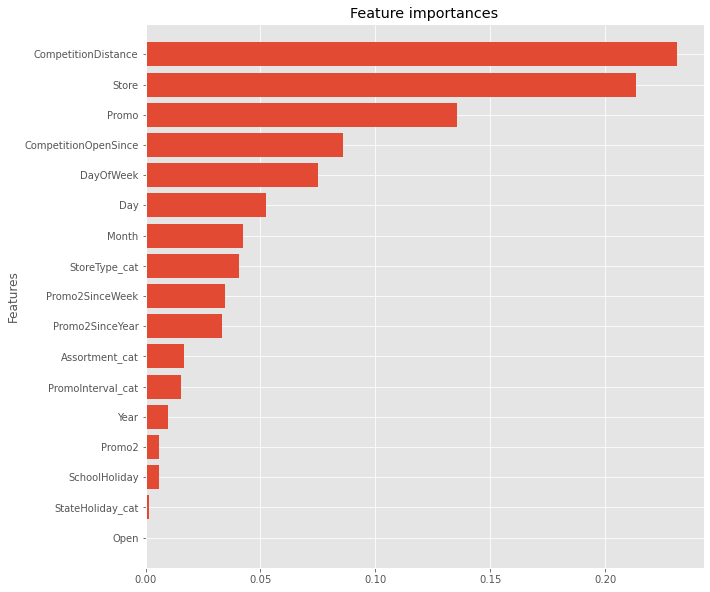

In [50]:
import itertools

importances = rfr.feature_importances_
std = np.std([rfr.feature_importances_ for tree in rfr.estimators_],
             axis=0)
indices = np.argsort(importances)
palette1 = itertools.cycle(sns.color_palette())
# Store the feature ranking
features_ranked=[]
for f in range(X_train.shape[1]):
    features_ranked.append(X_train.columns[indices[f]])
# Plot the feature importances of the forest

plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
            color=[next(palette1)], align="center")
plt.yticks(range(X_train.shape[1]), features_ranked)
plt.ylabel('Features')
plt.ylim([-1, X_train.shape[1]])
plt.show()

# XGBoost

In [51]:
def rmspe(y, yhat):
    return np.sqrt(np.mean((yhat/y-1) ** 2))

def rmspe_xg(yhat, y):
    y = np.expm1(y.get_label())
    yhat = np.expm1(yhat)
    return "rmspe", rmspe(y,yhat)

In [52]:
import xgboost as xgb

param = {'max_depth':10, # maximum depth of a tree
         "booster": "gbtree",   # use tree based models 
         'eta':1, # learning rate
         'silent':1, # silent mode
         'objective':'reg:linear', # for linear regression
        }

num_round = 100 #how many boosting rounds

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_train_test, y_train_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

xgboost = xgb.train(param, dtrain, num_round, evals=watchlist, \
  early_stopping_rounds= 100, feval=rmspe_xg, verbose_eval=True)
         
# make prediction
preds = xgboost.predict(dtest)



[19:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[19:35:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2274.74048	train-rmspe:nan	eval-rmse:2280.62012	eval-rmspe:nan


<ipython-input-51-4897c67880b8>:5: RuntimeWarning: overflow encountered in expm1
  y = np.expm1(y.get_label())
<ipython-input-51-4897c67880b8>:6: RuntimeWarning: overflow encountered in expm1
  yhat = np.expm1(yhat)
<ipython-input-51-4897c67880b8>:2: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(np.mean((yhat/y-1) ** 2))


[1]	train-rmse:2150.51172	train-rmspe:nan	eval-rmse:2172.11084	eval-rmspe:nan
[2]	train-rmse:1908.46045	train-rmspe:nan	eval-rmse:1936.46753	eval-rmspe:nan
[3]	train-rmse:1790.47107	train-rmspe:nan	eval-rmse:1818.58521	eval-rmspe:nan
[4]	train-rmse:1684.37695	train-rmspe:nan	eval-rmse:1714.69250	eval-rmspe:nan
[5]	train-rmse:1443.98120	train-rmspe:nan	eval-rmse:1478.74268	eval-rmspe:nan
[6]	train-rmse:1334.68005	train-rmspe:nan	eval-rmse:1370.91614	eval-rmspe:nan
[7]	train-rmse:1269.42444	train-rmspe:nan	eval-rmse:1309.71252	eval-rmspe:nan
[8]	train-rmse:1225.16174	train-rmspe:nan	eval-rmse:1271.75378	eval-rmspe:nan
[9]	train-rmse:1173.63867	train-rmspe:nan	eval-rmse:1221.33789	eval-rmspe:nan
[10]	train-rmse:1085.91455	train-rmspe:nan	eval-rmse:1136.87000	eval-rmspe:nan
[11]	train-rmse:1026.86218	train-rmspe:nan	eval-rmse:1082.00647	eval-rmspe:nan
[12]	train-rmse:994.43628	train-rmspe:nan	eval-rmse:1052.96899	eval-rmspe:nan
[13]	train-rmse:973.64453	train-rmspe:nan	eval-rmse:1036.35938

<ipython-input-51-4897c67880b8>:2: RuntimeWarning: divide by zero encountered in true_divide
  return np.sqrt(np.mean((yhat/y-1) ** 2))


[55]	train-rmse:682.88623	train-rmspe:nan	eval-rmse:866.50738	eval-rmspe:nan
[56]	train-rmse:678.20593	train-rmspe:nan	eval-rmse:864.43079	eval-rmspe:nan
[57]	train-rmse:673.83789	train-rmspe:nan	eval-rmse:862.83087	eval-rmspe:nan
[58]	train-rmse:670.47400	train-rmspe:nan	eval-rmse:862.42169	eval-rmspe:nan
[59]	train-rmse:666.79163	train-rmspe:nan	eval-rmse:861.51373	eval-rmspe:nan
[60]	train-rmse:664.12372	train-rmspe:nan	eval-rmse:860.89117	eval-rmspe:nan
[61]	train-rmse:662.41650	train-rmspe:nan	eval-rmse:860.54138	eval-rmspe:nan
[62]	train-rmse:658.79236	train-rmspe:nan	eval-rmse:860.09802	eval-rmspe:nan
[63]	train-rmse:654.57916	train-rmspe:nan	eval-rmse:857.90753	eval-rmspe:nan
[64]	train-rmse:652.98810	train-rmspe:nan	eval-rmse:857.44122	eval-rmspe:nan
[65]	train-rmse:649.79364	train-rmspe:nan	eval-rmse:856.47644	eval-rmspe:nan
[66]	train-rmse:646.08850	train-rmspe:nan	eval-rmse:855.05829	eval-rmspe:nan
[67]	train-rmse:642.95410	train-rmspe:nan	eval-rmse:854.21204	eval-rmspe:nan

In [53]:
rmse_xgboost = math.sqrt(mean_squared_error(y_train_test, preds))
print("RMSE:", rmse_xgboost)

RMSE: 841.9207317999857


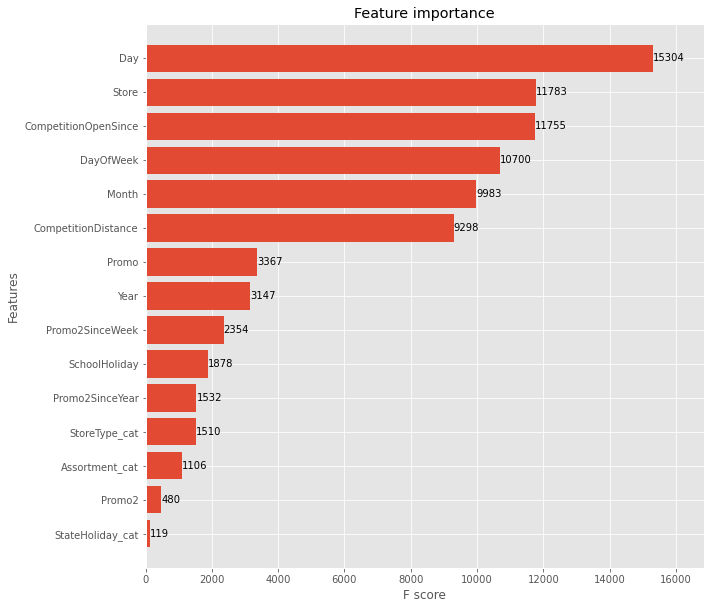

In [54]:
# Lets see the feature importance
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(xgboost, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [55]:
print("Seeing the scores together")

model_errors = pd.DataFrame({
    "Model": ["Random Forest Regression", "XGBoost"],
    "Score": [rmse_rfr, rmse_xgboost]
})

model_errors.sort_values(by = "Score", ascending = True)

Seeing the scores together


,Model,Score
1,XGBoost,841.920732
0,Random Forest Regression,983.091300
